### Importação das bibliotecas

In [105]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from joblib import dump, load
from graphviz import Graph, Digraph
import numpy as np
import pandas as pd
import graphviz

### Tratamento dos dados

In [ ]:
# Definimos o ssed dos valores aleatórios para 25
np.random.seed(25)

# Importamos os dados do dataset
arquivo = pd.read_csv('drug200.csv')

# Mapeamos as conversões de nomes e valores do dataset
rename_columns = {
    "Age" : "Idade",
    "Sex" : "Sexo",
    "BP" : "PS",
    "Cholesterol" : "Colesterol",
    "Na_to_K" : "Sodio_Potassio",
    "Drug" : "Remédio"
}

rename_classes = {
    "drugA" : "A",
    "drugB" : "B",
    "drugC" : "C",
    "drugX" : "X",
    "DrugY" : "Y",
}

rename_sexo = {
    "F" : 0,
    "M" : 1
}

rename_levels = {
    "LOW" : 1,
    "NORMAL" : 2,
    "HIGH" : 3,
}

# Renomeamos as colunas para português
arquivo = arquivo.rename(columns=rename_columns)

# Convertemos os valores textuais para numéricos
arquivo.loc[:, "Sexo"] = arquivo.loc[:, "Sexo"].map(rename_sexo)
arquivo.loc[:, "PS"] = arquivo.loc[:, "PS"].map(rename_levels)
arquivo.loc[:, "Colesterol"] = arquivo.loc[:, "Colesterol"].map(rename_levels)
arquivo.loc[:, "Remédio"] = arquivo.loc[:, "Remédio"].map(rename_classes)

# Atribuímos as variáveis para X e a classe para Y
x = arquivo[["Idade", "Sexo", "PS", "Sodio_Potassio", "Colesterol"]]

# Normalizamos os dados numéricos
# scaler = MinMaxScaler()
# colunas_numeircas = x[["Idade", "PS", "Sodio_Potassio", "Colesterol"]].values
# dados_normalizados = scaler.fit_transform(colunas_numeircas)
# x[["Idade", "PS", "Sodio_Potassio", "Colesterol"]] = dados_normalizados

y = arquivo["Remédio"]

# x.head()


### Visualização de métricas para análise

In [126]:
# Plotamos histogramas para verificar a distribuição dos dados

# plt.hist(x["Idade"], rwidth=0.9)
# plt.hist(x["PS"], rwidth=0.9)
# plt.hist(x["Colesterol"], rwidth=0.9)
# plt.hist(x["Sodio_Potassio"], rwidth=0.9)
# plt.hist(x["Sexo"], rwidth=0.9)

mediaPS = x["PS"].mean()
mediaColesterol = x["Colesterol"].mean()
mediaSodioPotassio = x["Sodio_Potassio"].mean()
mediaIdade = x["Idade"].mean()

modaPs = x["PS"].mode()[0]
modaColesterol = x["Colesterol"].mode()[0]
modaSodioPotassio = x["Sodio_Potassio"].mode()[0]
modaIdade = x["Idade"].mode()[0]

dpPS = x["PS"].std()
dpColesterol = x["Colesterol"].std()
dpSodioPotassio = x["Sodio_Potassio"].std()
dpIdade = x["Idade"].std()

dpIdade


47

### Treinamento do modelo e medida de acurácia

A acurácio foi de 98.33333333333333%
A predição para a pessoa inserida foi: X


c:\Users\annal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.625, 0.9, 'Sodio_Potassio <= 14.638\ngini = 0.692\nsamples = 140\nvalue = [16, 11, 11, 38, 64]\nclass = Y'),
 Text(0.5, 0.7, 'PS <= 2.5\ngini = 0.664\nsamples = 76\nvalue = [16, 11, 11, 38, 0]\nclass = X'),
 Text(0.25, 0.5, 'Colesterol <= 2.5\ngini = 0.348\nsamples = 49\nvalue = [0, 0, 11, 38, 0]\nclass = X'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 0, 26, 0]\nclass = X'),
 Text(0.375, 0.3, 'PS <= 1.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]\nclass = X'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]\nclass = C'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]\nclass = X'),
 Text(0.75, 0.5, 'Idade <= 50.5\ngini = 0.483\nsamples = 27\nvalue = [16, 11, 0, 0, 0]\nclass = A'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]\nclass = A'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]\nclass = B'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 64\nvalue = [0, 0, 0, 0,

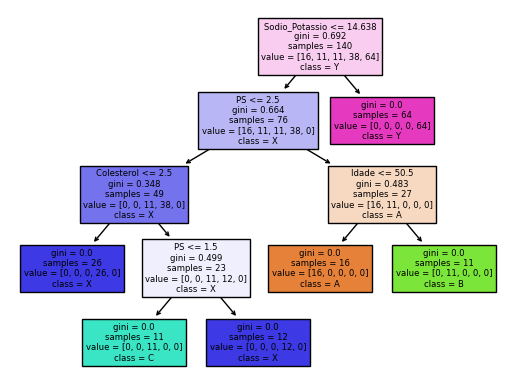

In [107]:
# Separamos o treino e o teste para as variáveis e para o alvo
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, stratify=y)

# Geramos a árvore de decisão utilizando gini como critério de cálculo de IG
clf = tree.DecisionTreeClassifier(criterion="gini")

#Treinamos o modelo utilizando treino X e treino Y
clf.fit(train_x, train_y)

# Predizemos o conteúdo do teste X
predict = clf.predict(test_x)
# print(predict)

# Calculamos a ácurácia comparando a predição realizada com os valores reais de teste Y
acuracia = accuracy_score(test_y, predict)
print("A acurácio foi de " + str(acuracia * 100) + "%")

# Salvamos o modelo treinado em um arquivo
dump(clf, 'modelo_dd.joblib')

# Carregamos o modelo
modelo = load('modelo_dd.joblib')
predict1 = modelo.predict([[0.7, 0.2, 0.2, 0.2, 0.6]])
print("A predição para a pessoa inserida foi: " + str(predict1[0]))

# print(classification_report(test_y, predict))

tree.plot_tree(clf, feature_names=x.columns, class_names=["A", "B", "C", "X", "Y"], filled=True)
# dot_data = tree.export_graphviz(clf, out_file=None, feature_names=x.columns, class_names=["A", "B", "C", "X", "Y"], filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)
# x.head()